#Heart Disease Prediction

Dataset: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease?resource=download

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
path = 'https://raw.githubusercontent.com/absiddik7/Datasets/main/heart_2020_cleaned.csv'
df = pd.read_csv(path)
df_c = df.copy() # keep a copy of the df

In [3]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

##Exploratory Data Analysis

###Heart Disease Distribution

In [5]:
disease = df.groupby('HeartDisease').size()
disease

HeartDisease
No     292422
Yes     27373
dtype: int64

Text(0.5, 1.0, 'Hear Disease')

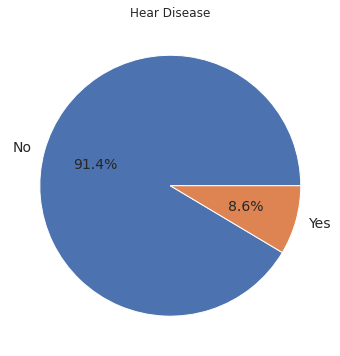

In [34]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
plt.pie(disease,labels=['No', 'Yes'],autopct='%1.1f%%', textprops={"fontsize": 14})
plt.title('Hear Disease')

**Insights**


*   Most people doesn't have heart disease
*   Dataset is highly unbalanced



**Gender Distribution** 

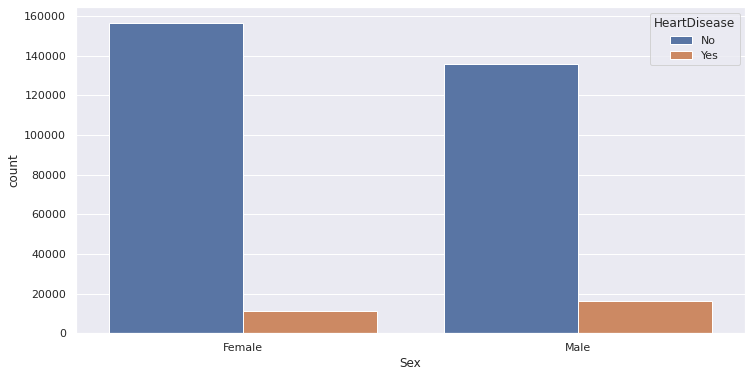

In [33]:
sns.set_style('darkgrid')
sns.countplot(data=df, x = 'Sex',hue='HeartDisease')

**Insights**


*   Majority are Females
*   Males have more Heart Disease than females





###Heart Disease among different Race

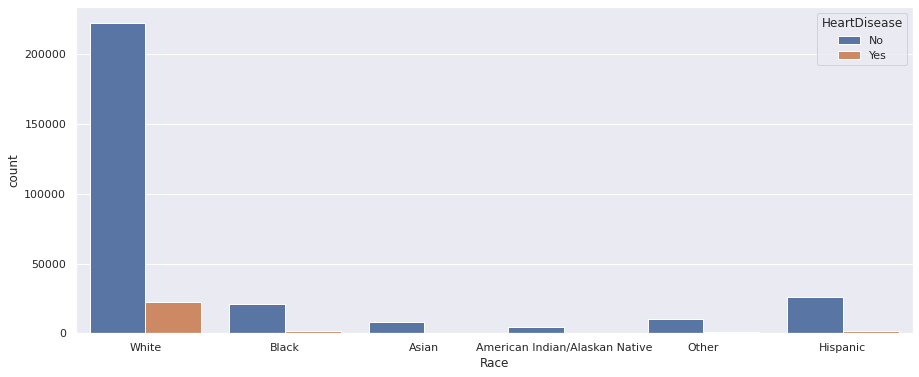

In [29]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,6))
sns.countplot(data=df, x = 'Race',hue='HeartDisease')
plt.show()

**Insights**


*   Majority peoples are White
*   Also, most heart disease patients are white people








###Age Category wise heart disease stats

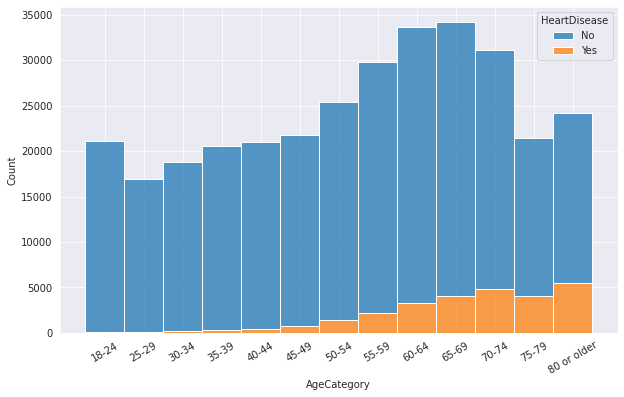

In [9]:
adata = df.sort_values(by=['AgeCategory'],ascending = True)
plt.figure(figsize=(10,6))
sns.histplot(data=adata, x="AgeCategory", hue="HeartDisease", multiple="stack")
plt.xticks(rotation=30)
plt.show()

**Insights**


*   People has heart disease are mostly old people




###Peoples describe their general health condition

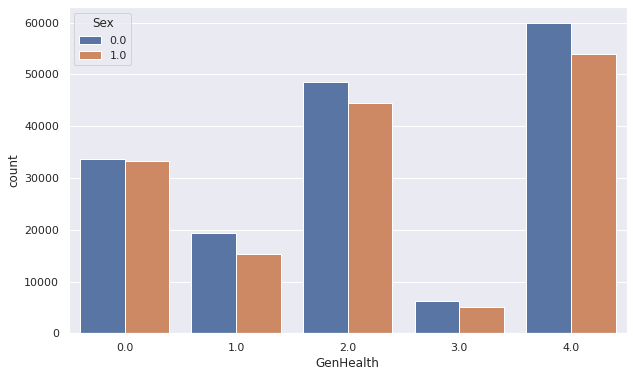

In [42]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x = 'GenHealth',hue='Sex')

**Insights**

*  Most of the people describe their general health as Very good and the ration of females are higher than male. 




##Data Preprocessing

###Missing Value Handling

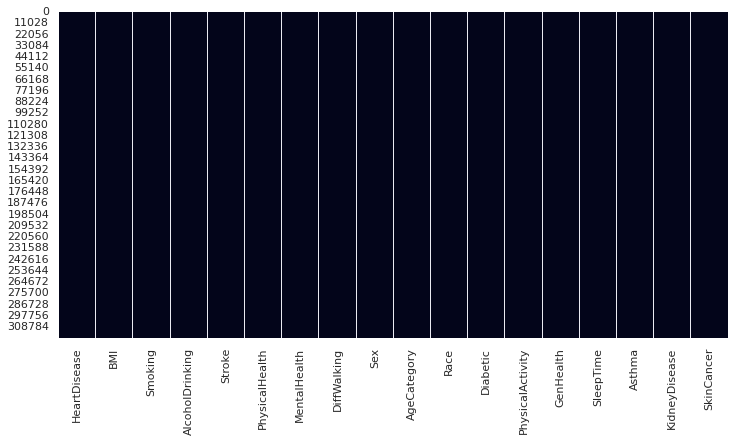

In [35]:
sns.set(rc = {'figure.figsize':(12,6)})
sns.heatmap(df.isnull(),cbar=False)

There is no missing values

###Encoding Categorical Values

In [47]:
from sklearn.preprocessing import OrdinalEncoder
categorical_col = df.select_dtypes(include=['object']).columns
ordEncoder = OrdinalEncoder()
df[categorical_col] = ordEncoder.fit_transform(df[categorical_col])

In [12]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0.0,16.60,1.0,0.0,0.0,3.0,30.0,0.0,0.0,7.0,5.0,2.0,1.0,4.0,5.0,1.0,0.0,1.0
1,0.0,20.34,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12.0,5.0,0.0,1.0,4.0,7.0,0.0,0.0,0.0
2,0.0,26.58,1.0,0.0,0.0,20.0,30.0,0.0,1.0,9.0,5.0,2.0,1.0,1.0,8.0,1.0,0.0,0.0
3,0.0,24.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,5.0,0.0,0.0,2.0,6.0,0.0,0.0,1.0
4,0.0,23.71,0.0,0.0,0.0,28.0,0.0,1.0,0.0,4.0,5.0,0.0,1.0,4.0,8.0,0.0,0.0,0.0


In [13]:
df.describe()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.00000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,0.085595,28.325399,0.412477,0.068097,0.037740,3.37171,3.898366,0.138870,0.475273,6.514536,4.396742,0.300386,0.775362,2.220904,7.097075,0.134061,0.036833,0.093244
std,0.279766,6.356100,0.492281,0.251912,0.190567,7.95085,7.955235,0.345812,0.499389,3.564759,1.212208,0.716480,0.417344,1.534647,1.436007,0.340718,0.188352,0.290775
min,0.000000,12.020000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,24.030000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,4.000000,5.000000,0.000000,1.000000,1.000000,6.000000,0.000000,0.000000,0.000000
50%,0.000000,27.340000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,7.000000,5.000000,0.000000,1.000000,2.000000,7.000000,0.000000,0.000000,0.000000
75%,0.000000,31.420000,1.000000,0.000000,0.000000,2.00000,3.000000,0.000000,1.000000,9.000000,5.000000,0.000000,1.000000,4.000000,8.000000,0.000000,0.000000,0.000000
max,1.000000,94.850000,1.000000,1.000000,1.000000,30.00000,30.000000,1.000000,1.000000,12.000000,5.000000,3.000000,1.000000,4.000000,24.000000,1.000000,1.000000,1.000000


###Correlation

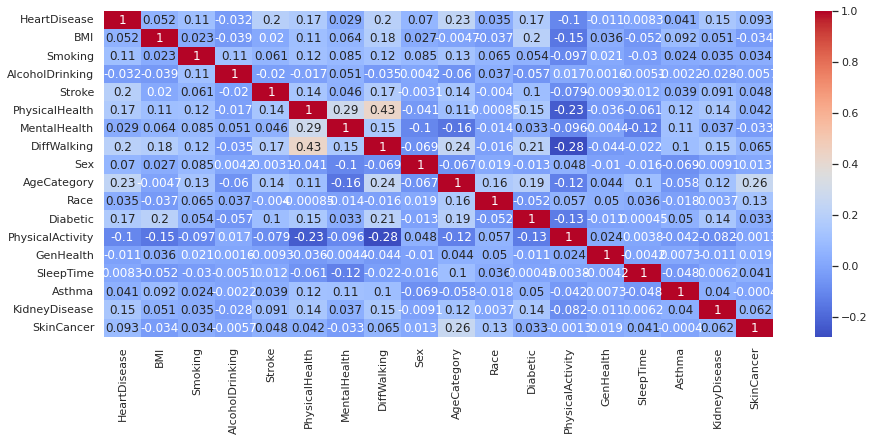

In [50]:
sns.set(rc = {'figure.figsize':(15,6)})
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

###Dataset Balancing

In [15]:
disease = df.groupby('HeartDisease').size()
disease

HeartDisease
0.0    292422
1.0     27373
dtype: int64

Here we can see the dataset is highly imbalanced. Let's balance it.

In [16]:
X = df.drop('HeartDisease',axis=1)
y = df['HeartDisease']

In [17]:
y.value_counts()

0.0    292422
1.0     27373
Name: HeartDisease, dtype: int64

In [18]:
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler

In [19]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X,y)

In [20]:
y_resampled.value_counts()

0.0    292422
1.0    292422
Name: HeartDisease, dtype: int64

#Machine Learning 

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size=0.3, random_state=42)

###Descision Tree Classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
predictions = dtree.predict(X_test)
print (classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95     87576
         1.0       0.91      1.00      0.95     87878

    accuracy                           0.95    175454
   macro avg       0.96      0.95      0.95    175454
weighted avg       0.95      0.95      0.95    175454



###Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
rfc_prediction = rfc.predict(X_test)
print (classification_report(y_test,rfc_prediction))

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96     87576
         1.0       0.93      1.00      0.97     87878

    accuracy                           0.96    175454
   macro avg       0.97      0.96      0.96    175454
weighted avg       0.97      0.96      0.96    175454



#Conclusions

Accuracy

1.   Decision Tree Classifier: 95% 
2.   Random Forest Classifier: 96%

